In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather/weatherpreprocess.csv


In [2]:
weather_df=pd.read_csv('/kaggle/input/weather/weatherpreprocess.csv')

In [3]:
weather_df.columns

Index(['Unnamed: 0', 'TIMESTAMP', 'M_PIT_SPEED_LIMIT', 'M_DYNAMIC_RACING_LINE',
       'M_DYNAMIC_RACING_LINE_TYPE', 'M_PIT_STOP_REJOIN_POSITION',
       'M_PIT_ASSIST', 'M_SESSION_TIME', 'M_FORECAST_ACCURACY',
       'M_AIR_TEMPERATURE', 'M_NUM_WEATHER_FORECAST_SAMPLES',
       'M_AIR_TEMPERATURE.1', 'M_SESSION_UID', 'M_PACKET_ID',
       'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET',
       'M_WEATHER_FORECAST_SAMPLES_M_WEATHER',
       'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE',
       'M_TRACK_TEMPERATURE_CHANGE',
       'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE',
       'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_WEATHER'],
      dtype='object')

In [4]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [5]:
# Putting feature variable to X
X = weather_df.drop('M_WEATHER',axis=1)
# Putting response variable to y
y =weather_df['M_WEATHER']

In [6]:
X = weather_df.drop('TIMESTAMP',axis=1)

In [7]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [8]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((2500629, 22), (1071699, 22))

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [11]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 3min 49s, sys: 5.23 s, total: 3min 55s
Wall time: 2min 15s


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [12]:
y_pred=classifier_rf.predict(X_test)

In [13]:
pob_pred=classifier_rf.predict_proba(X_test)

In [14]:
dfs=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dfs

,Actual,Predicted
2551295,0,0
2178416,0,0
8340,0,0
2838915,0,0
1903317,0,0
...,...,...
2654278,0,0
2087414,0,0
490695,2,2
581306,1,1


In [15]:
# View a list of the features and their importance scores
list(zip(pob_pred,y_test))

[(array([9.79390304e-01, 1.74167344e-02, 6.19705911e-04, 2.57325614e-03]), 0),
 (array([9.94751526e-01, 4.73285908e-03, 1.11857481e-04, 4.03757816e-04]), 0),
 (array([9.86262998e-01, 1.20068300e-02, 3.08932296e-04, 1.42123977e-03]), 0),
 (array([9.86563364e-01, 1.02479047e-02, 9.47416476e-05, 3.09398948e-03]), 0),
 (array([9.82354677e-01, 1.58213564e-02, 1.40481269e-03, 4.19153558e-04]), 0),
 (array([9.93197455e-01, 6.40020586e-03, 1.67320361e-04, 2.35018622e-04]), 0),
 (array([9.81495699e-01, 1.64136520e-02, 1.67149579e-03, 4.19153558e-04]), 0),
 (array([0.97837119, 0.01536251, 0.00151236, 0.00475394]), 0),
 (array([9.74766865e-01, 2.35923292e-02, 1.17910579e-03, 4.61699507e-04]), 0),
 (array([9.82354677e-01, 1.58213564e-02, 1.40481269e-03, 4.19153558e-04]), 0),
 (array([0.29103698, 0.69451773, 0.00752134, 0.00692396]), 1),
 (array([9.46083734e-01, 5.20502561e-02, 1.32698461e-03, 5.39025318e-04]), 0),
 (array([0.03488199, 0.96079626, 0.001595  , 0.00272675]), 1),
 (array([0.97759866, 

In [16]:
rf_probs = classifier_rf.predict_proba(X_test)

In [17]:
rf_probs.shape

(1071699, 4)

In [18]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.999833908588139


In [19]:
from numpy import unique
classes = unique(y_test)
total = len(y)
for c in classes:
	n_examples = len(y[y==c])
	percent = n_examples / total * 100
	print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

> Class=0 : 2664421/3572328 (74.6%)
> Class=1 : 763609/3572328 (21.4%)
> Class=2 : 101486/3572328 (2.8%)
> Class=5 : 42812/3572328 (1.2%)


In [20]:
final_prob=np.max(classifier_rf.predict_proba(X_test), axis=1)

In [21]:
dfs=pd.DataFrame({'Actual':y_test, 'Predicted':final_prob})
dfs

,Actual,Predicted
2551295,0,0.979390
2178416,0,0.994752
8340,0,0.986263
2838915,0,0.986563
1903317,0,0.982355
...,...,...
2654278,0,0.992694
2087414,0,0.991964
490695,2,0.898274
581306,1,0.919448


In [22]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
Accuracy: 99.94 %.


In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0003097884760553103
Mean Squared Error: 0.0005971826044439717
Root Mean Squared Error: 0.02443731991123355


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


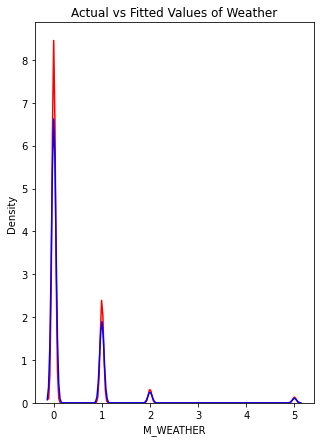

In [24]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values of Weather')


plt.show()
plt.close()

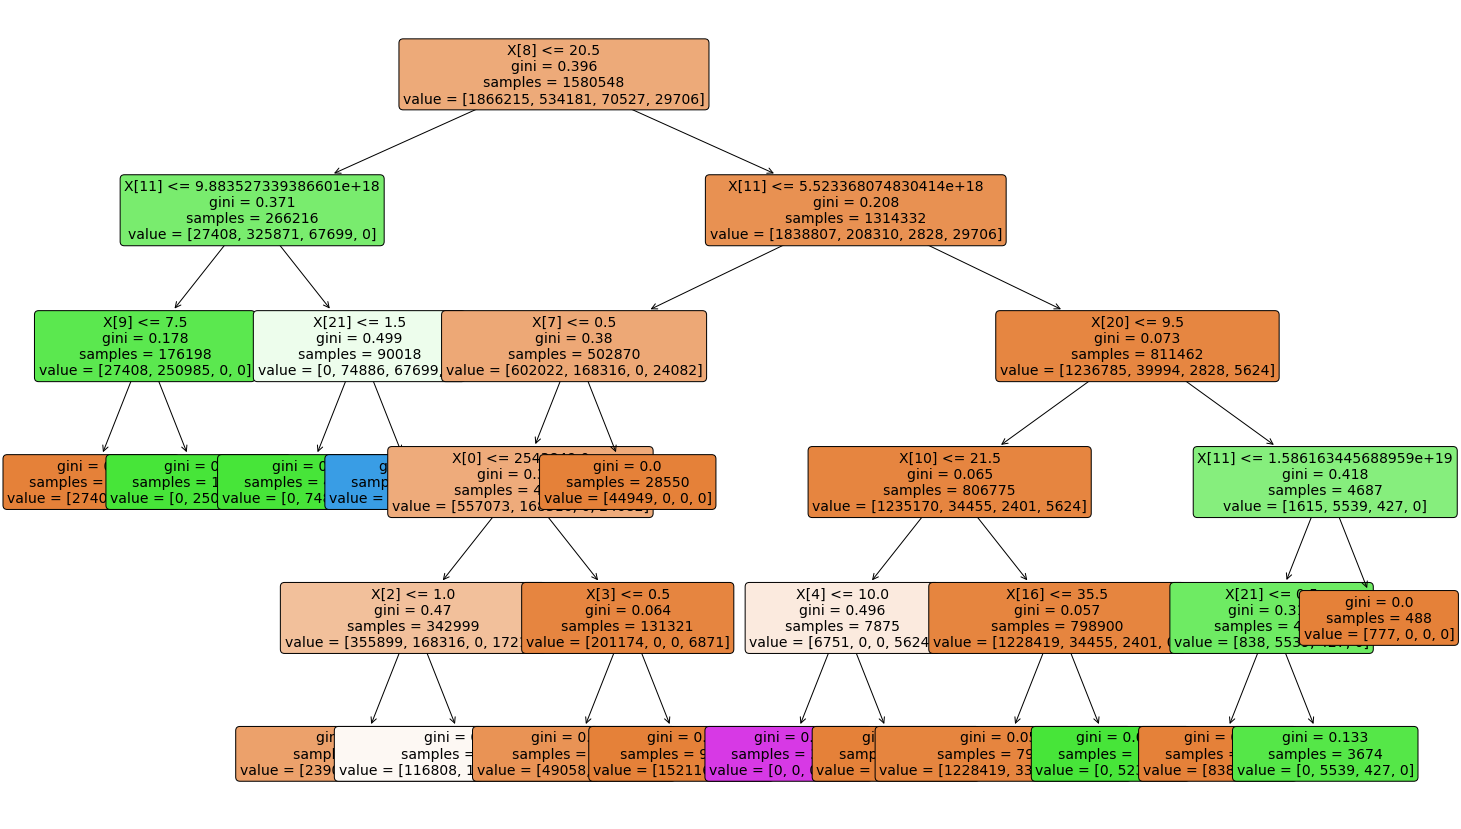

In [25]:
import pydot
# Pull out one tree from the forest
Tree = classifier_rf.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [26]:
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

Train Data Score: 0.999850037730507
Test Data Score: 0.999833908588139


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
print(confusion_matrix(y_test,y_pred))

[[798787      0      0      0]
 [     0 229391      0      0]
 [   154     24  30419      0]
 [     0      0      0  12924]]


In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_rf, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.99990402 0.99985804 0.99980805 0.99988003 0.99981405]
Average cross-validation score: 0.9998528370106919


In [30]:
import pickle


In [31]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_rf, file) # here classifier_logreg is trained model